In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd   
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

# 데이터셋
### 범주형 자료형
1. gender(성별)
2. car(차 소유 유무)
3. reality(차 소유 우무)
4. income_type(소득 분류) 
    - Commercial associate : 상업 관계자..? 
    - Pensioner : 연금 수령자 
5. edu_type(교육 수준)
6. familly_type(결혼 여부)
7. house_type(생활 방식)
8. FLAG_MOBIL(핸드폰 소유 여부)
9. work_phone(업무용 전화 소유 여부)
10. phone(전화 소유 여부)
11. email(이메일 소유 여부)
12. occyp_type(직업 유형)

### 연속형
1. child_num(자녀 수)
2. income_total(연간 소득)
3. DAYS_BIRTH(출생일)
4. DAYS_EMPLOYED(업무 시작일)
5. family_size(가족 규모)
6. begin_month(신용카드 발급 월)

# 시각화

In [77]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

continuous_list = ['child_num','income_total','DAYS_BIRTH', 'DAYS_EMPLOYED','family_size', 'begin_month']
category_list = ['gender', 'car', 'reality', 'income_type','edu_type', 'family_type',
                 'house_type', 'work_phone', 'phone', 'email', 'occyp_type']

# For EDA
data=pd.concat([train, test])

# 음수들 양수로 변환 변환
data['DAYS_BIRTH'] = -data['DAYS_BIRTH']
data['DAYS_EMPLOYED'] = -data['DAYS_EMPLOYED']
data['begin_month'] = -data['begin_month']

# 모든 사람은 핸드폰을 가지고 있다.
data = data.drop(['FLAG_MOBIL'], axis=1)

print(train.shape)
print(test.shape)
print(data.shape)

(26457, 20)
(10000, 19)
(36457, 19)


In [4]:
data.isnull().sum()

index                0
gender               0
car                  0
reality              0
child_num            0
income_total         0
income_type          0
edu_type             0
family_type          0
house_type           0
DAYS_BIRTH           0
DAYS_EMPLOYED        0
FLAG_MOBIL           0
work_phone           0
phone                0
email                0
occyp_type       11323
family_size          0
begin_month          0
credit           10000
dtype: int64

<AxesSubplot:>

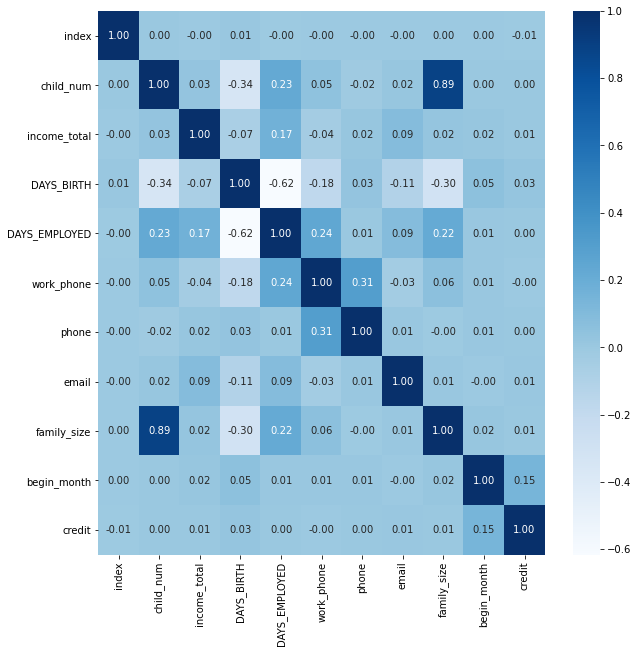

In [10]:
# 변수 간 상관계수
plt.rcParams['figure.figsize'] = [10, 10]
sns.heatmap(data = data.corr(),annot=True,fmt = '.2f',cmap='Blues') #annot = True : 셀 안에 상관계수 값 포함

## 연속형변수

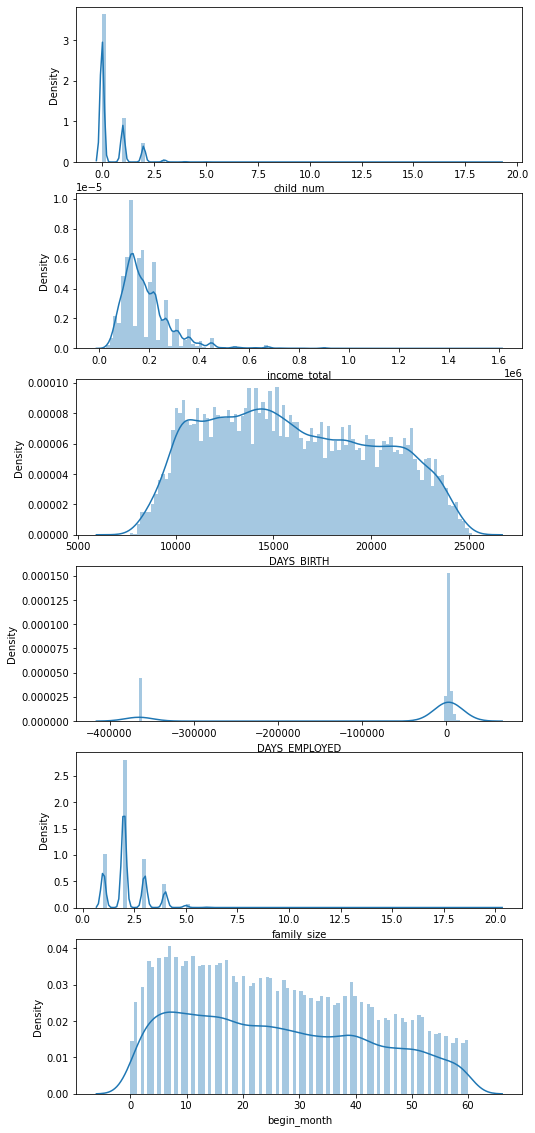

In [11]:
# distplot : 분포 파악
plt.rcParams['figure.figsize'] = [8, 20]
fig, ax = plt.subplots(len(continuous_list))
for i, c in enumerate(continuous_list):
    sns.distplot(data[c], ax = ax[i], bins=100 )

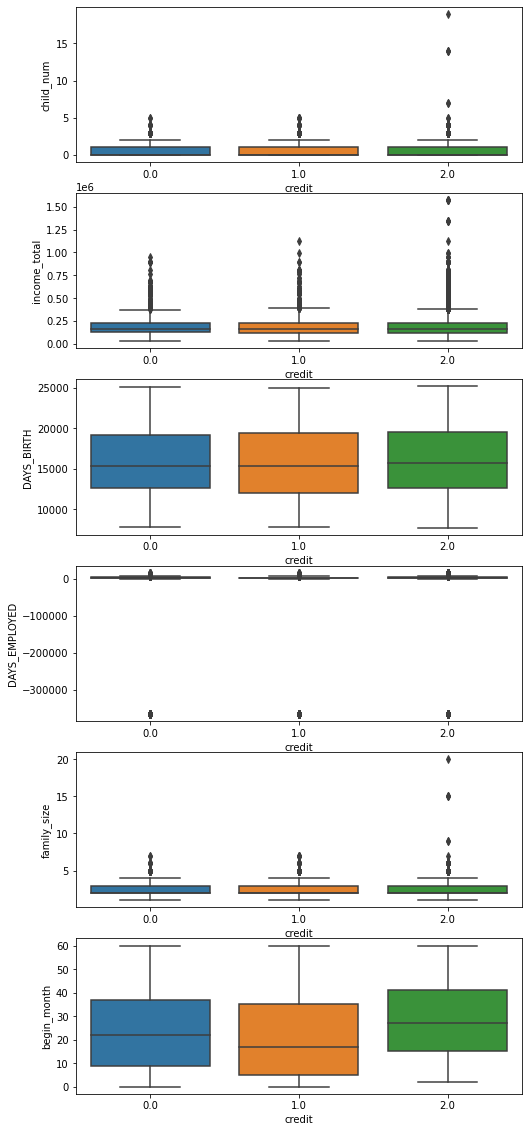

In [12]:
# Boxplot -> 이상치의 여부를 대략적으로 확인할 수 있고 분위수를 알 수 있음
plt.rcParams['figure.figsize'] = [8, 20]
fig, ax = plt.subplots(len(continuous_list))
for i, c in enumerate(continuous_list):
    sns.boxplot(y= data[c], x= data["credit"], ax = ax[i])

<AxesSubplot:xlabel='DAYS_EMPLOYED', ylabel='Density'>

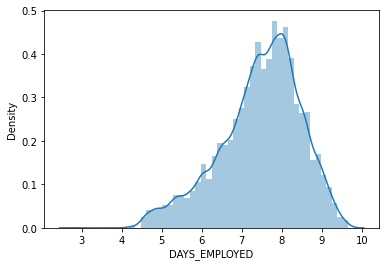

In [23]:
# EMPLOYED 로그변환
a = data[data['DAYS_EMPLOYED'] > 0]
plt.rcParams['figure.figsize'] = [6, 4]
sns.distplot(a['DAYS_EMPLOYED'].apply(lambda x: np.log(x) if x > 0 else 0 ) )

## 범주형 변수

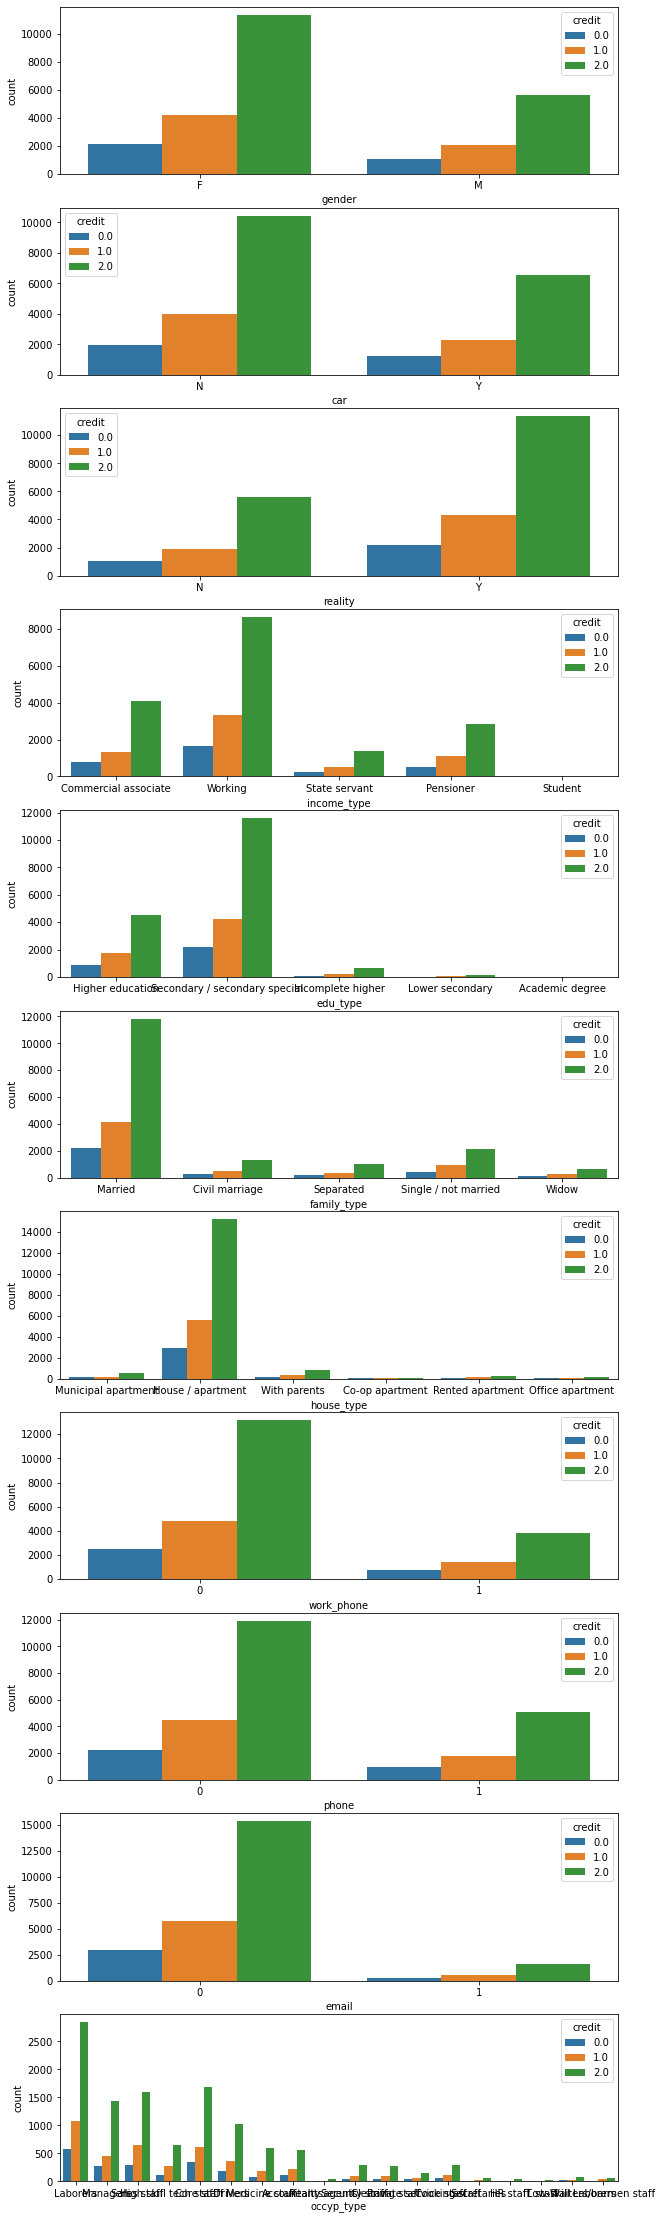

In [16]:
# 범주형 변수 Countplot -> 변수의 분포 파악 가능
plt.rcParams['figure.figsize'] = [10, 40]

fig, ax = plt.subplots(len(category_list))
for i, c in enumerate(category_list):
    sns.countplot(x=c, data=data, ax = ax[i], hue="credit" )

## occyp_type 채우기

<AxesSubplot:xlabel='occyp_type', ylabel='income_total'>

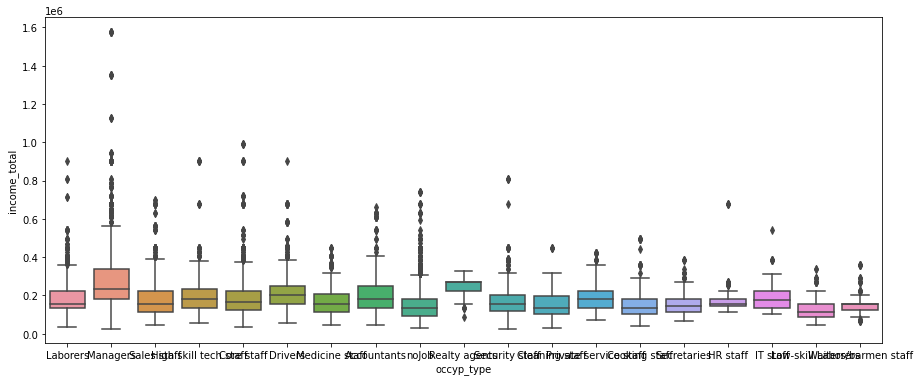

In [201]:
plt.rcParams['figure.figsize'] = [15, 6]
sns.boxplot(x=data['occyp_type'], y= data['income_total'])

In [65]:
# 무직자들은 모두 occyp_type이 0이다!
data[data['DAYS_EMPLOYED'] < 0].occyp_type.value_counts(dropna=False)

NaN    6135
Name: occyp_type, dtype: int64

In [78]:
occyp_type = []
for i, x in data.iterrows():
    if x.DAYS_EMPLOYED < 0:
        occyp_type.append('noJob')
    else:
        occyp_type.append(x.occyp_type)
data['occyp_type'] = occyp_type

In [80]:
data.occyp_type.value_counts(dropna=False)

Laborers                 6211
noJob                    6135
NaN                      5188
Core staff               3591
Sales staff              3485
Managers                 3012
Drivers                  2138
High skill tech staff    1383
Accountants              1241
Medicine staff           1207
Cooking staff             655
Security staff            592
Cleaning staff            551
Private service staff     344
Low-skill Laborers        175
Waiters/barmen staff      174
Secretaries               151
HR staff                   85
Realty agents              79
IT staff                   60
Name: occyp_type, dtype: int64

<AxesSubplot:xlabel='occyp_type', ylabel='count'>

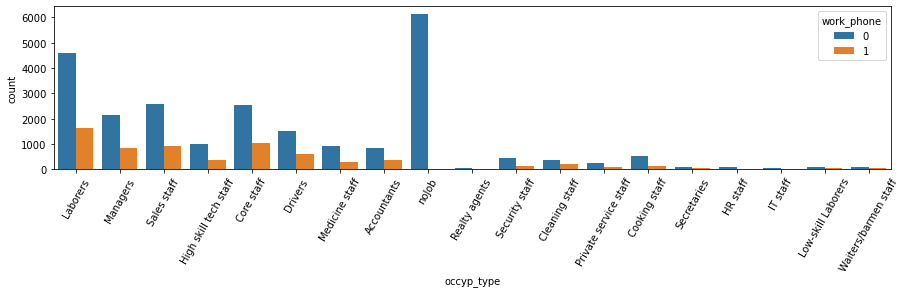

In [81]:
plt.rcParams['figure.figsize'] = [15, 3]
plt.xticks(rotation=60)
sns.countplot(x='occyp_type', data = data, hue='work_phone')

<AxesSubplot:xlabel='occyp_type', ylabel='count'>

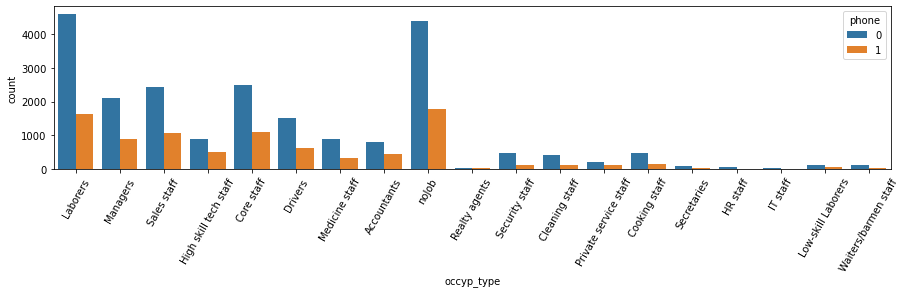

In [82]:
plt.xticks(rotation=60)
sns.countplot(x='occyp_type', data = data, hue='phone')

<AxesSubplot:xlabel='occyp_type', ylabel='count'>

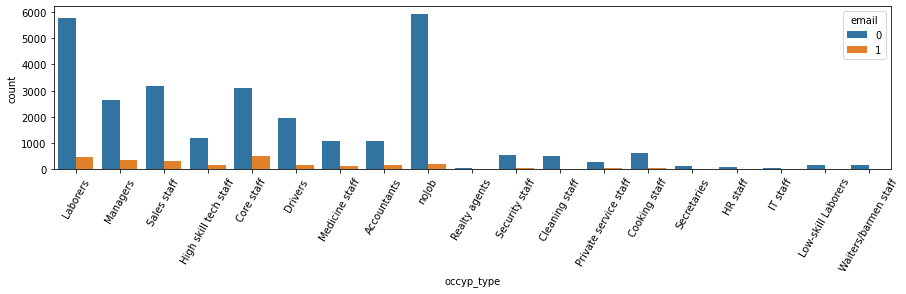

In [83]:
plt.xticks(rotation=60)
sns.countplot(x='occyp_type', data = data, hue='email')

<AxesSubplot:xlabel='occyp_type', ylabel='count'>

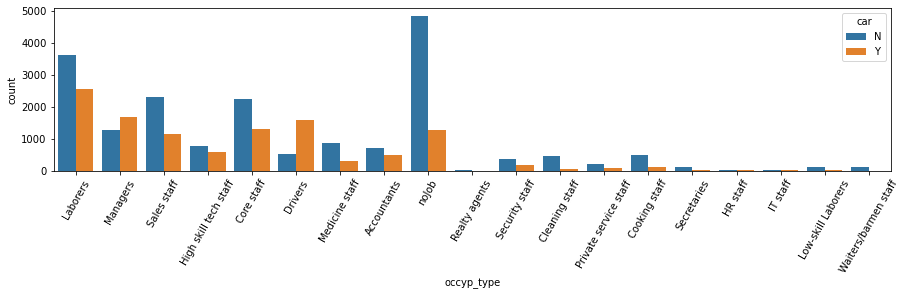

In [84]:
plt.xticks(rotation=60)
sns.countplot(x='occyp_type', data = data, hue='car')

<AxesSubplot:xlabel='occyp_type', ylabel='count'>

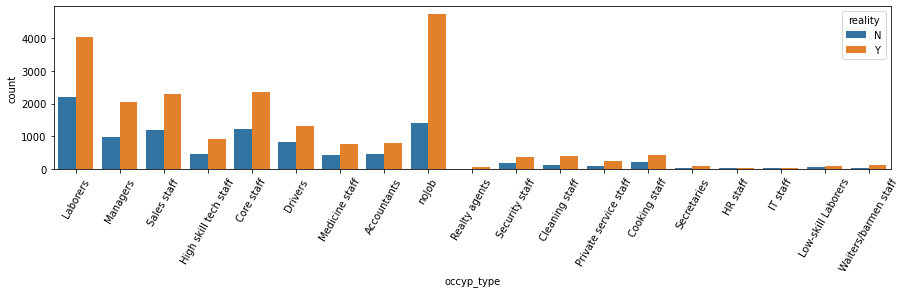

In [85]:
plt.xticks(rotation=60)
sns.countplot(x='occyp_type', data = data, hue='reality')

<AxesSubplot:xlabel='occyp_type', ylabel='count'>

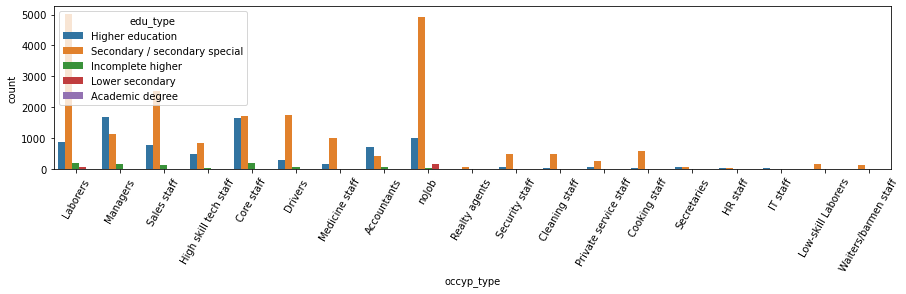

In [86]:
plt.xticks(rotation=60)
sns.countplot(x='occyp_type', data = data, hue='edu_type')

<AxesSubplot:xlabel='occyp_type', ylabel='income_total'>

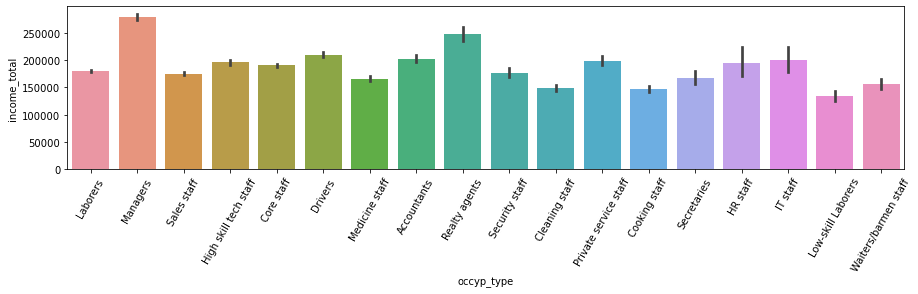

In [47]:
plt.xticks(rotation=60)
sns.barplot(x='occyp_type', y='income_total', data= data)

### NaN 채우기

In [196]:
#fit_data = data[data['occyp_type'].notnull()]
fit_data= data
fit_data = fit_data[['work_phone', 'phone', 'email', 'car', 'reality', 'edu_type', 'income_total','occyp_type']]
print(f'fit_data : {fit_data.shape}')

fit_data : (36457, 8)


In [197]:
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()
fit_data['car'] = lbl.fit_transform(fit_data['car'].values)
fit_data['reality'] = lbl.fit_transform(fit_data['reality'].values)

fit_data['occyp_type'] = fit_data['occyp_type'].fillna('NaN')
fit_data['occyp_type'] = lbl.fit_transform(fit_data['occyp_type'].values)
# NaN은 12로 인코딩됨
fit_data['occyp_type'] = fit_data['occyp_type'].replace(12, np.NaN)

# edu_type 순서화
edu_dict = {'Secondary / secondary special' : 2, 'Higher education' : 4,'Incomplete higher' : 3, 'Lower secondary' : 1, 'Academic degree' : 5}
fit_data['edu_type'] = fit_data['edu_type'].apply(lambda x: edu_dict[x])

fit_data


,work_phone,phone,email,car,reality,edu_type,income_total,occyp_type
0,0,0,0,0,0,4,202500.0,NaN
1,0,0,1,0,1,2,247500.0,8.0
2,0,1,0,1,1,4,450000.0,10.0
3,0,1,0,0,1,2,202500.0,15.0
4,0,0,0,1,1,4,157500.0,10.0
...,...,...,...,...,...,...,...,...
9995,1,1,0,1,1,3,202500.0,0.0
9996,1,0,0,1,1,2,202500.0,8.0
9997,0,0,0,0,1,2,292500.0,11.0
9998,0,1,0,1,0,2,180000.0,NaN


In [171]:
!pip install impyute

In [203]:
from impyute.imputation.cs import mice
np_imputed=mice(data.values) # mice 학습시작
fit_data = pd.DataFrame(np_imputed)
fit_data

BadInputError: Data is not float.

In [157]:
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import scipy.stats as ss

In [158]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import math

def visualize_silhouette(cluster_lists, X_features,a): 
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산.
        if a == 'kmeans' :
            clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state = 0)
        elif a == 'spectral' :
            clusterer = SpectralClustering(n_clusters = n_cluster, random_state = 0)
        elif a == 'agg' :
            clusterer = AgglomerativeClustering(n_clusters = n_cluster)
        elif a == 'gmm' :
            clusterer = GaussianMixture(n_components = n_cluster, random_state = 0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel(a)
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

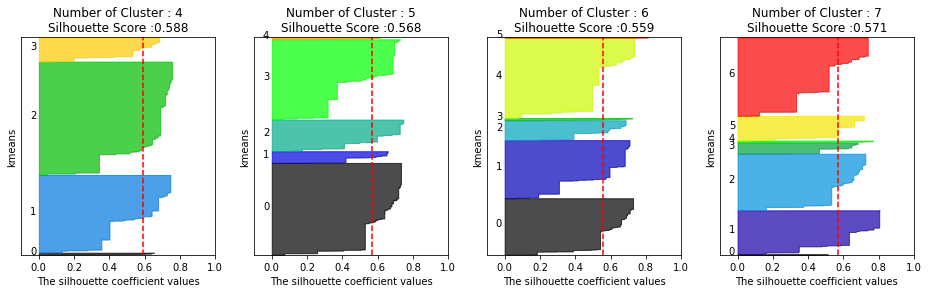

In [126]:
visualize_silhouette([4,5,6,7], 
                     fit_data[['work_phone', 'phone', 'email', 'car', 'reality', 'edu_type', 'income_total']],
                     'kmeans')

In [165]:
fit_data['KMEANS'] =  KMeans(n_clusters = 10, init = 'k-means++', max_iter = 100, random_state = 0).fit_predict(fit_data[['work_phone', 'phone', 'email', 'car', 'reality', 'edu_type', 'income_total']])
fit_data

,work_phone,phone,email,car,reality,edu_type,income_total,occyp_type,KMEANS
1,0,0,1,0,1,2,247500.0,Laborers,6
2,0,1,0,1,1,4,450000.0,Managers,7
3,0,1,0,0,1,2,202500.0,Sales staff,3
4,0,0,0,1,1,4,157500.0,Managers,9
5,0,0,1,0,1,2,270000.0,High skill tech staff,6
...,...,...,...,...,...,...,...,...,...
9994,0,0,0,1,1,2,131400.0,noJob,0
9995,1,1,0,1,1,3,202500.0,Accountants,3
9996,1,0,0,1,1,2,202500.0,Laborers,3
9997,0,0,0,0,1,2,292500.0,Medicine staff,6


In [166]:
fit_data.KMEANS.value_counts()

0    8603
9    6574
3    5268
5    4406
6    3220
1    1968
7     885
2     260
4      71
8      14
Name: KMEANS, dtype: int64

In [167]:
a = pd.crosstab(index=fit_data.KMEANS, columns = fit_data.occyp_type, normalize='columns')
a.idxmax(axis=0)

occyp_type
Accountants              0
Cleaning staff           0
Cooking staff            0
Core staff               0
Drivers                  9
HR staff                 0
High skill tech staff    0
IT staff                 9
Laborers                 0
Low-skill Laborers       5
Managers                 3
Medicine staff           0
Private service staff    0
Realty agents            6
Sales staff              0
Secretaries              0
Security staff           0
Waiters/barmen staff     9
noJob                    0
dtype: int64